In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns

In [2]:
%matplotlib inline
style.use('seaborn-poster')
style.use('ggplot')

plt.rc('figure', figsize=(10, 4))

In [3]:
data = pd.read_csv('housedata.csv')
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [43]:
data['bedrooms'] = data['bedrooms'].astype(int)
data['date'] = pd.to_datetime(data['date'])

In [5]:
data.isna().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [6]:
data.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

In [7]:
data.shape

(4600, 18)

### Group Columns
#### Numerical Variable - continues
Price
sqft_living
sqft_lot
yr_built
yr_renovated
#### Categorical - ordinal
floors
bedrooms
bathrooms
#### Categorical - nominal
waterfront
street
city

In [8]:
data['price'].unique()

array([ 313000.      , 2384000.      ,  342000.      , ...,
        416904.166667,  203400.      ,  220600.      ])

In [9]:
data['bedrooms'].unique()

array([3, 5, 4, 2, 6, 7, 9, 1, 8, 0], dtype=int64)

In [10]:
data['bathrooms'].unique()

array([1.5 , 2.5 , 2.  , 2.25, 1.  , 1.75, 2.75, 3.  , 3.25, 3.5 , 8.  ,
       4.25, 4.  , 3.75, 5.  , 4.5 , 5.75, 1.25, 6.5 , 4.75, 0.75, 5.25,
       5.5 , 6.25, 0.  , 6.75])

In [11]:
data['sqft_living'].nunique()

566

In [12]:
data['sqft_living'].nunique()

566

In [13]:
data['sqft_lot'].nunique()

3113

In [14]:
data['floors'].nunique()

6

In [15]:
data['waterfront'].unique()

array([0, 1], dtype=int64)

In [16]:
data['view'].unique()

array([0, 4, 1, 2, 3], dtype=int64)

In [17]:
data['condition'].unique()

array([3, 5, 4, 2, 1], dtype=int64)

In [18]:
data['sqft_above'].nunique()

511

In [19]:
data['sqft_basement'].nunique()

207

In [20]:
data['yr_built'].unique()

array([1955, 1921, 1966, 1963, 1976, 1938, 1989, 1985, 1945, 1948, 1909,
       1980, 1939, 1965, 1956, 1997, 1987, 1983, 1923, 1954, 2005, 1991,
       1959, 1920, 1979, 1951, 1967, 2004, 2014, 1995, 1944, 1992, 1957,
       1978, 1974, 1950, 1990, 1949, 1968, 1977, 1996, 2001, 2000, 1929,
       2006, 2008, 2009, 2012, 2013, 2007, 1986, 1973, 1988, 1900, 1928,
       1982, 1960, 2003, 1998, 1942, 1908, 1958, 1971, 1975, 1961, 1924,
       1902, 1962, 1953, 1999, 1994, 1930, 1984, 2010, 1912, 1947, 1916,
       1940, 1970, 1952, 1964, 1926, 1905, 1969, 1903, 1943, 1993, 1946,
       1910, 1904, 1981, 1906, 1922, 2011, 2002, 1917, 1913, 1914, 1937,
       1925, 1932, 1918, 1972, 1941, 1919, 1936, 1911, 1927, 1931, 1901,
       1907, 1915, 1935, 1933, 1934], dtype=int64)

In [21]:
data['city'].unique()

array(['Shoreline', 'Seattle', 'Kent', 'Bellevue', 'Redmond',
       'Maple Valley', 'North Bend', 'Lake Forest Park', 'Sammamish',
       'Auburn', 'Des Moines', 'Bothell', 'Federal Way', 'Kirkland',
       'Issaquah', 'Woodinville', 'Normandy Park', 'Fall City', 'Renton',
       'Carnation', 'Snoqualmie', 'Duvall', 'Burien', 'Covington',
       'Inglewood-Finn Hill', 'Kenmore', 'Newcastle', 'Mercer Island',
       'Black Diamond', 'Ravensdale', 'Clyde Hill', 'Algona', 'Skykomish',
       'Tukwila', 'Vashon', 'Yarrow Point', 'SeaTac', 'Medina',
       'Enumclaw', 'Snoqualmie Pass', 'Pacific', 'Beaux Arts Village',
       'Preston', 'Milton'], dtype=object)

In [22]:
data['street'].unique()

array(['18810 Densmore Ave N', '709 W Blaine St',
       '26206-26214 143rd Ave SE', ..., '759 Ilwaco Pl NE',
       '5148 S Creston St', '18717 SE 258th St'], dtype=object)

In [23]:
data['sqft_basement'].nunique()

207

In [24]:
data['date'].nunique()

70

### Univariate analysis

Categorical Columns

* waterfront
* street
* city
* floors
* bedrooms
* bathrooms

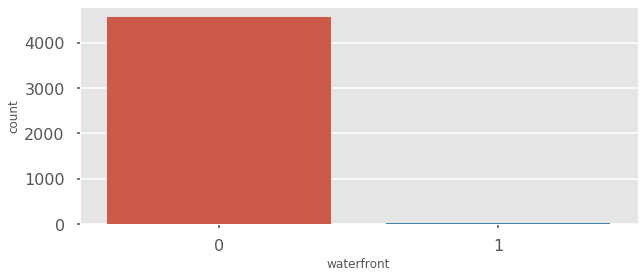

In [25]:
sns.countplot(x='waterfront', data=data)

In [26]:
street_freq = data['street'].value_counts()
street_freq

2520 Mulberry Walk NE    4
2500 Mulberry Walk NE    3
19454 SE 27th Pl         2
4924 SE 2nd Pl           2
769 N 74th St            2
                        ..
11240 106th Ave NE       1
821 Dayton Ave NE        1
236 NW 176th Pl          1
28030 185th Pl SE        1
8681 Beacon Ave S        1
Name: street, Length: 4525, dtype: int64

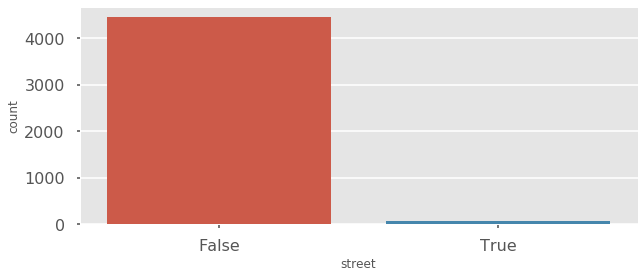

In [27]:
sns.countplot(data['street'].value_counts() > 1)

In [28]:
city_freq = data['city'].value_counts()
city_freq

Seattle                1573
Renton                  293
Bellevue                286
Redmond                 235
Kirkland                187
Issaquah                187
Kent                    185
Auburn                  176
Sammamish               175
Federal Way             148
Shoreline               123
Woodinville             115
Maple Valley             96
Mercer Island            86
Burien                   74
Snoqualmie               71
Kenmore                  66
Des Moines               58
North Bend               50
Covington                43
Duvall                   42
Lake Forest Park         36
Newcastle                33
Bothell                  33
Tukwila                  29
SeaTac                   29
Vashon                   29
Enumclaw                 28
Carnation                22
Normandy Park            18
Clyde Hill               11
Medina                   11
Fall City                11
Black Diamond             9
Ravensdale                7
Pacific             

(0, 500)

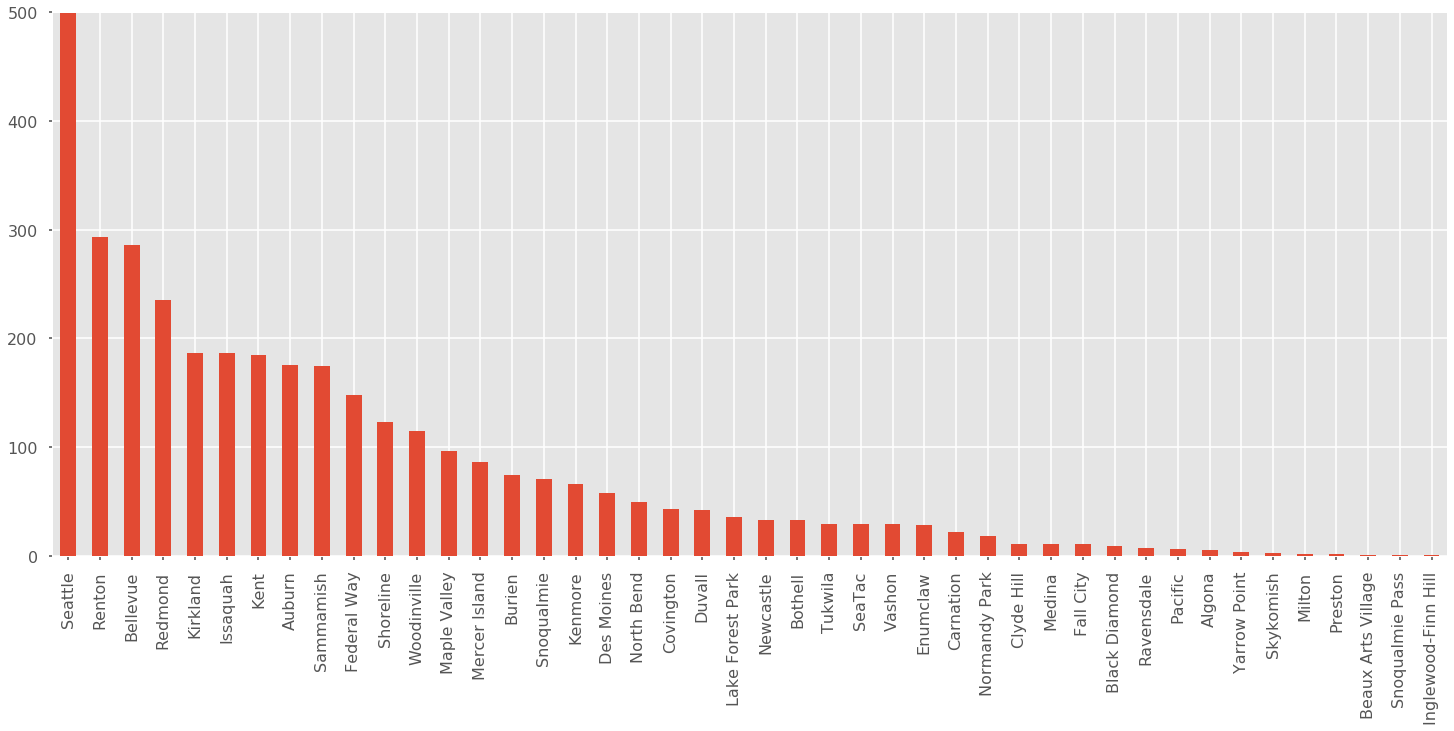

In [29]:
data['city'].value_counts().plot(kind = 'bar', figsize=(25,10))
plt.ylim(0, 500)

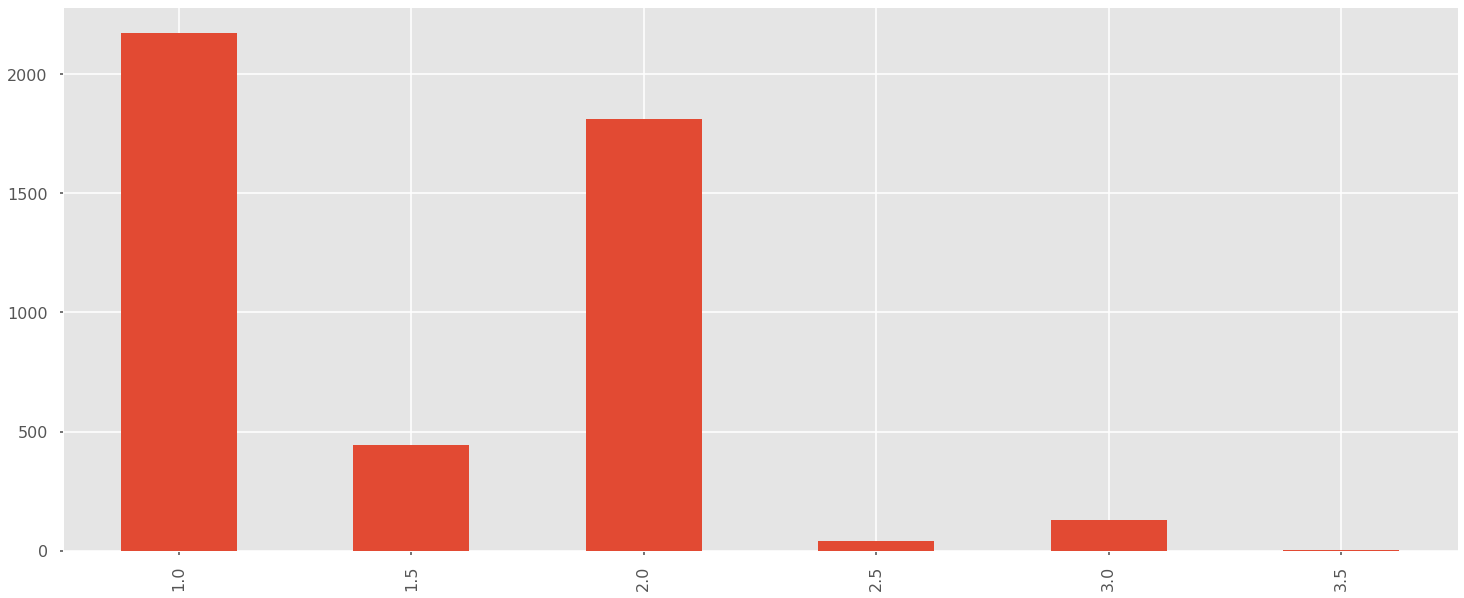

In [31]:
data['floors'].value_counts().sort_index().plot(kind = 'bar', figsize=(25,10))

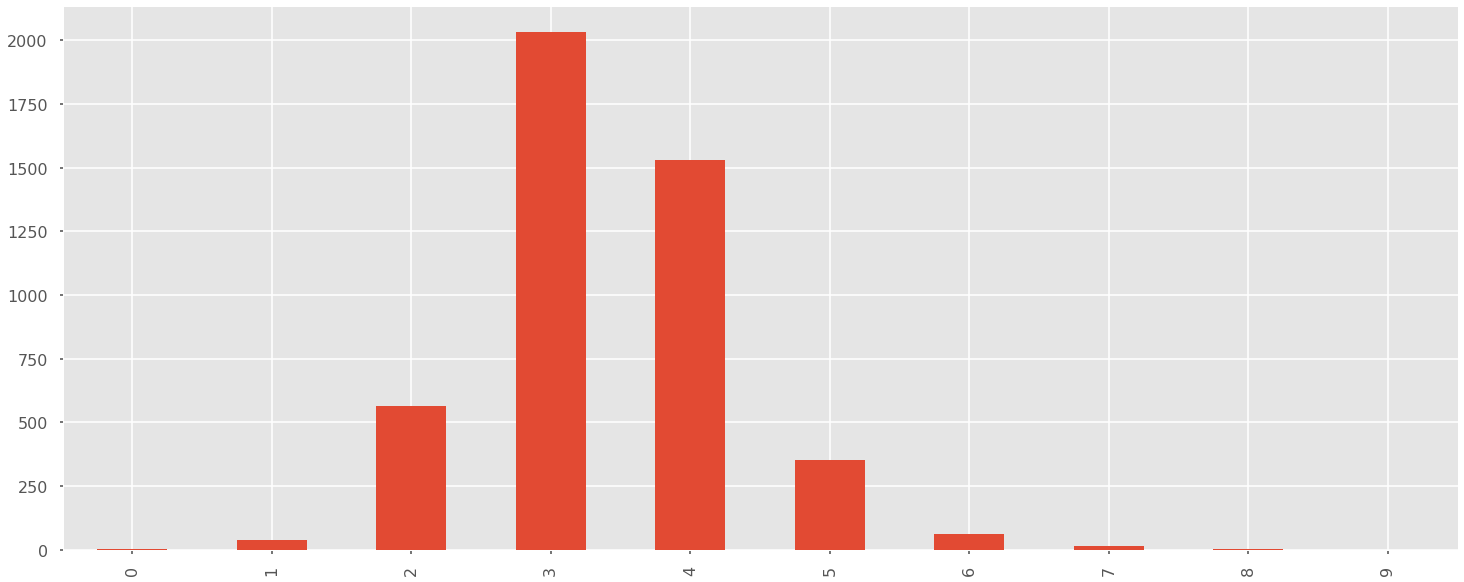

In [32]:
data['bedrooms'].value_counts().sort_index().plot(kind = 'bar', figsize=(25,10))

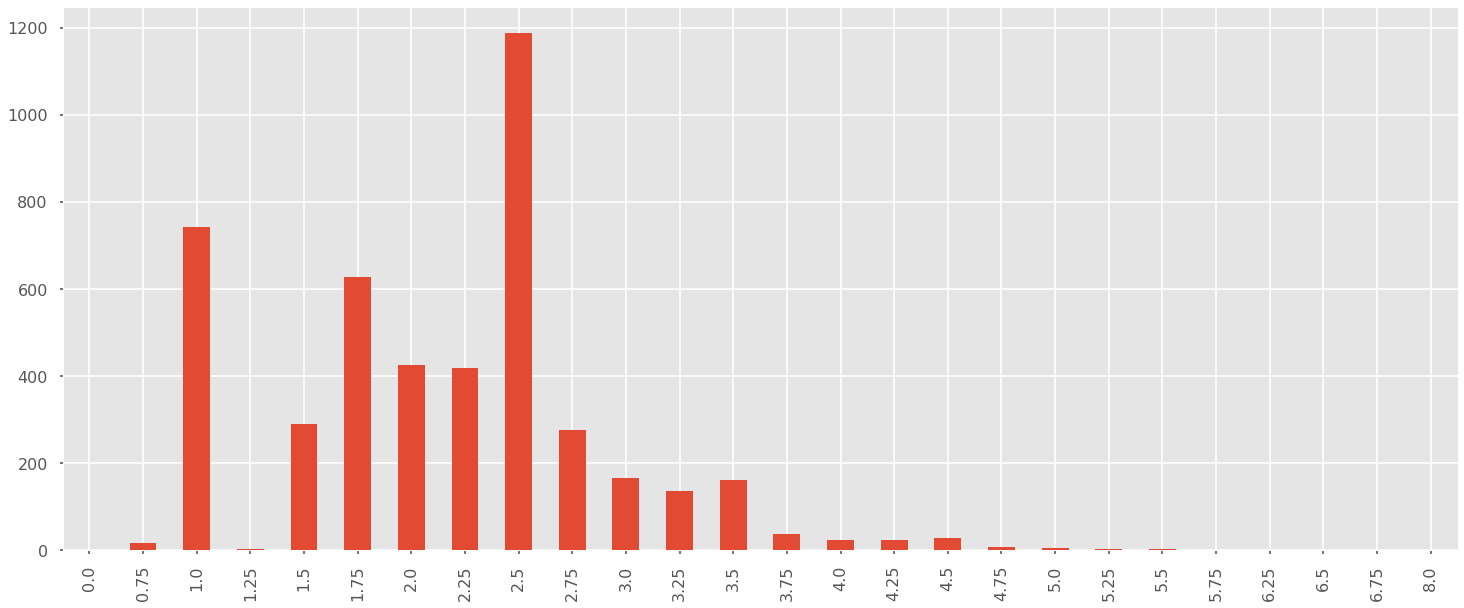

In [33]:
data['bathrooms'].value_counts().sort_index().plot(kind = 'bar', figsize=(25,10))

### Univariate analysis

Numerical Columns

* Price
* sqft_living
* sqft_lot
* yr_built
* yr_renovated

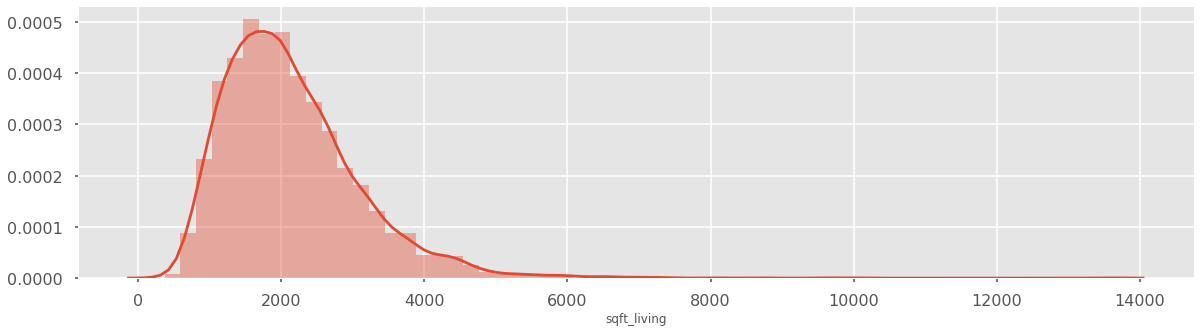

In [34]:
plt.figure(figsize=(20,5))
sns.distplot(data['sqft_living'], bins=60)

In [35]:
sqft_living_skew = data['sqft_living'].skew()
sqft_living_mean = data['sqft_living'].mean()
sqft_living_median = data['sqft_living'].median()
print(sqft_living_skew)
print(sqft_living_mean)
print(sqft_living_median)

1.723513270622118
2139.3469565217392
1980.0


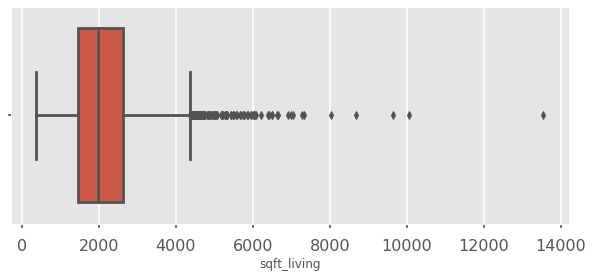

In [36]:
sns.boxplot(data['sqft_living'])

In [37]:
def get_lower_upper_bound(my_data):
    # Get first and third quartile
    q1 = np.percentile(my_data, 25)
    q3 = np.percentile(my_data, 75)
    
    # Calculate Interquartile range
    iqr = q3 - q1
    
    # Compute lower and upper bound
    lower_bound = q1 - (iqr * 1.5)
    upper_bound = q3 + (iqr * 1.5)
    
    return lower_bound, upper_bound

In [38]:
def get_outliers_iqr(my_data):
    lower_bound, upper_bound = get_lower_upper_bound(my_data)
    # Filter data less than lower bound and more than upper bound
    return my_data[np.where((my_data > upper_bound) |
                            (my_data < lower_bound))]

In [39]:
get_outliers_iqr(data['sqft_living'].values)

array([13540,  4420,  4490,  4510,  4490,  4460,  6210,  5860,  5190,
        7270,  5420,  4700,  4530,  4400,  5300,  4860,  5774,  4470,
        4910,  4560,  6490,  5520,  4380,  4560,  4460,  4460,  4850,
        4460,  5330,  5305,  6040,  5060,  4380,  4390,  4740,  4580,
        5584,  4850,  4590,  5940,  4440,  4490,  4700,  4410,  4730,
        6980,  4430,  4960,  5700,  5550,  4370,  4500,  4400,  4590,
        4720,  4410,  4610,  5180,  5660,  4400,  4670,  4600,  4400,
        4420,  5270, 10040,  4500,  8670,  4860,  5730,  4410,  9640,
        4420,  6050,  6430,  4850,  4680,  4750,  5990,  4640,  6900,
        5480,  4410,  6630,  4910,  4570,  4470,  6390,  4810,  4620,
        4690,  4380,  4500,  5850,  4660,  4480,  6640,  4390,  4830,
        5000,  4390,  7050,  5190,  4570,  4660,  4930,  5070,  4370,
        5010,  5430,  4740,  5270,  6500,  7320,  4710,  4440,  4830,
        5780,  5430,  6070,  4630,  4430,  5030,  5340,  5010,  5960,
        5230,  4550,

##### using a loop to plot all numeric-conitnuous var


In [60]:
numeric_continuous_cols = ['price','sqft_living','sqft_lot','yr_built','yr_renovated']

In [61]:
list(enumerate(numeric_continuous_cols))

[(0, 'price'),
 (1, 'sqft_living'),
 (2, 'sqft_lot'),
 (3, 'yr_built'),
 (4, 'yr_renovated')]

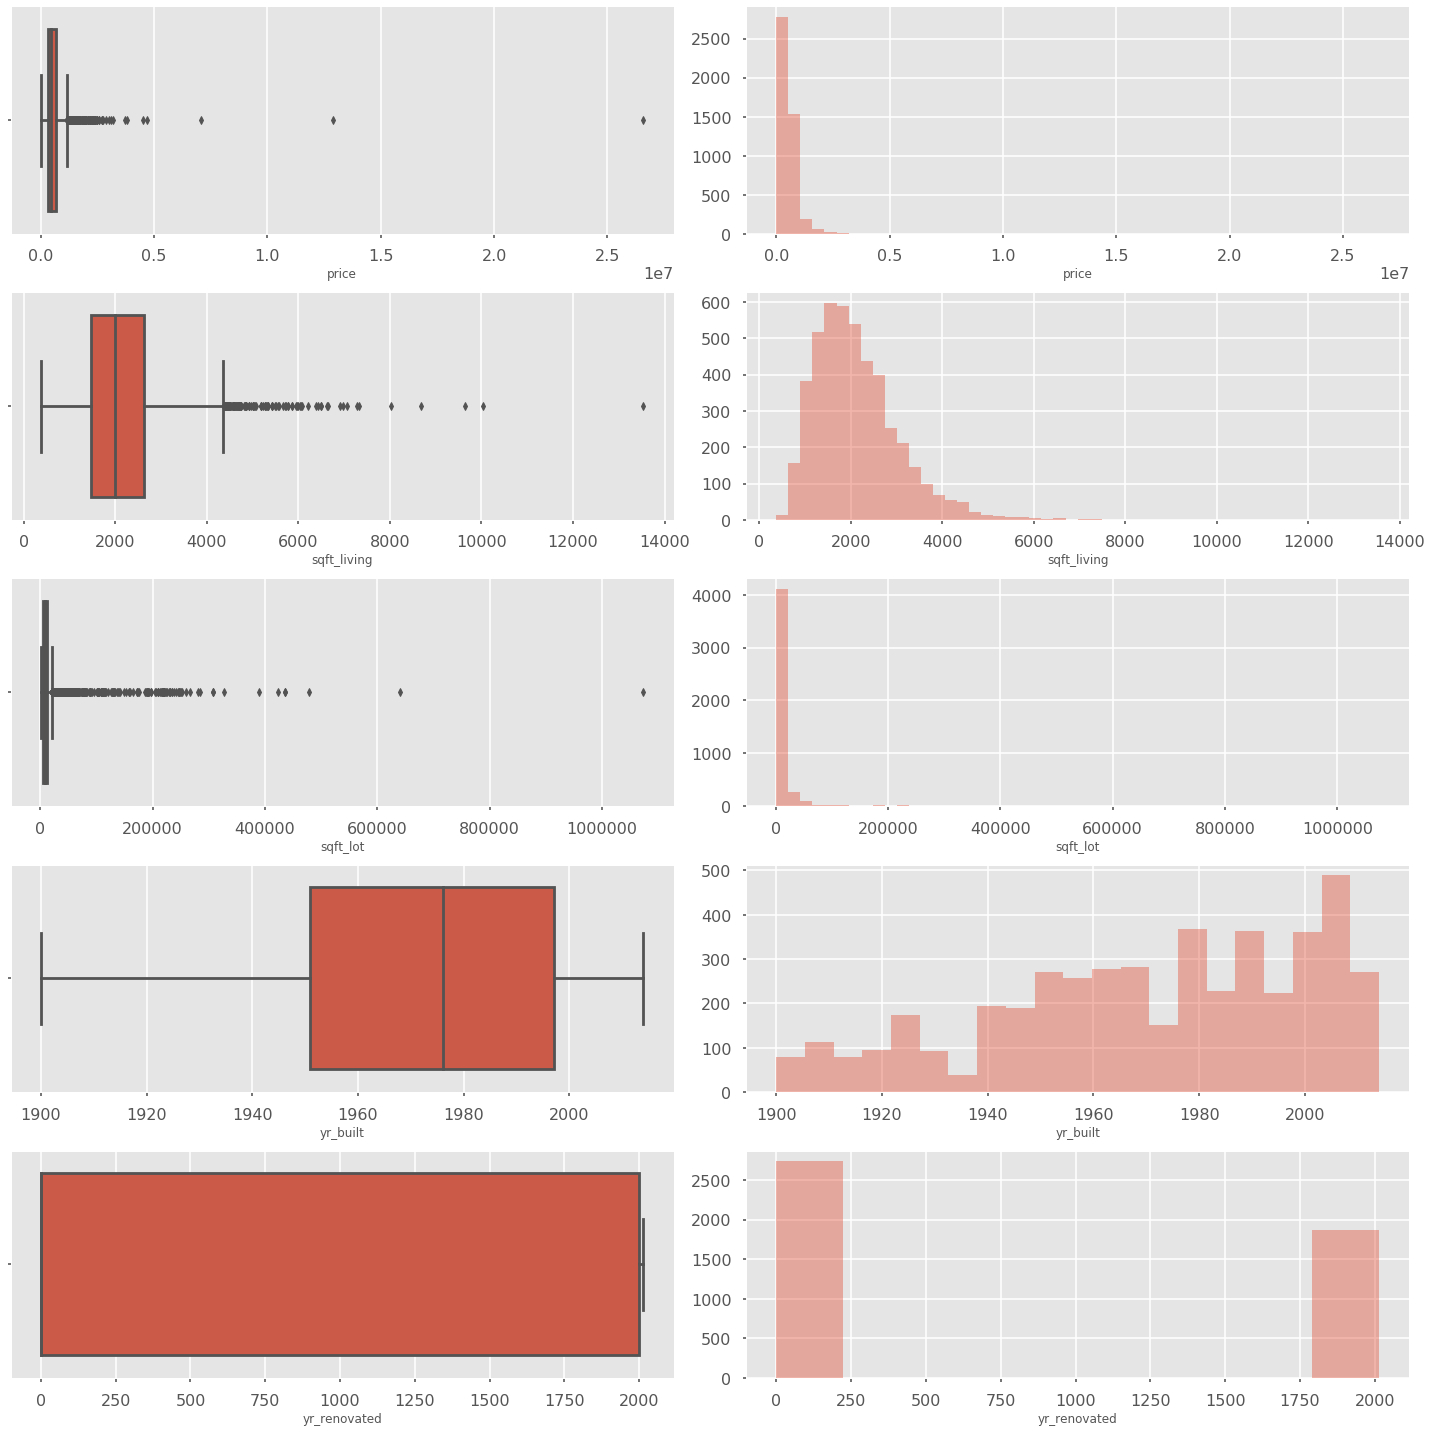

In [63]:
fig, axes = plt.subplots(5,2, figsize=(20,20))

for i, col in enumerate(numeric_continuous_cols):
    sns.boxplot(data[col], ax=axes[i,0])
    sns.distplot(data[col], kde=False, ax=axes[i,1])
    
    
    fig.tight_layout()

In [64]:
plt.figure(figsize=(20,5))
sns.distplot(data['yr_renovated'], bins=5)
set(xlim=(0,15),ylim=(0,100)))

SyntaxError: invalid syntax (<ipython-input-64-3e4039bf0312>, line 3)

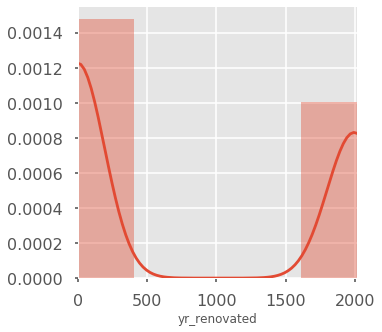

In [59]:
fig, ax = plt.subplots(figsize=(5,5))
sns.distplot(data['yr_renovated'], ax=ax, bins=5)
#ax.set_xlim(0,2014)
#ax.set_xticks(range(,2015))
plt.show()

### Bivariate Analysis

#### Numerical & Numerical

* Price
* sqft_living
* sqft_lot
* yr_built
* yr_renovated

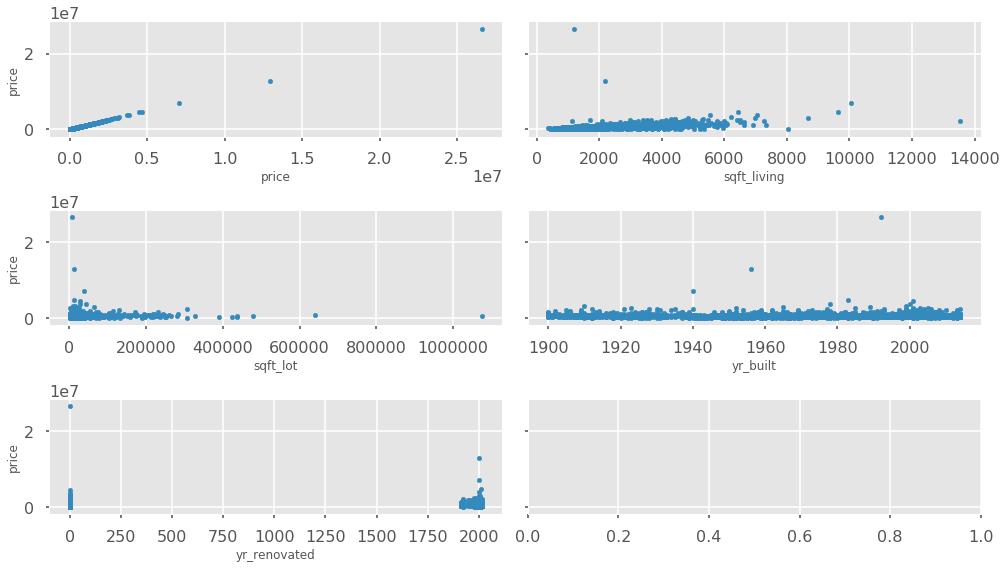

In [68]:
numeric_price_cols = ['price','sqft_living','sqft_lot','yr_built','yr_renovated']

fig, axes = plt.subplots(3, 2, figsize=(14, 8), sharey=True)

for col, ax in zip(numeric_price_cols, axes.flatten()):
    data.plot(x=col, y = 'price', kind='scatter', ax=ax)

fig.tight_layout()

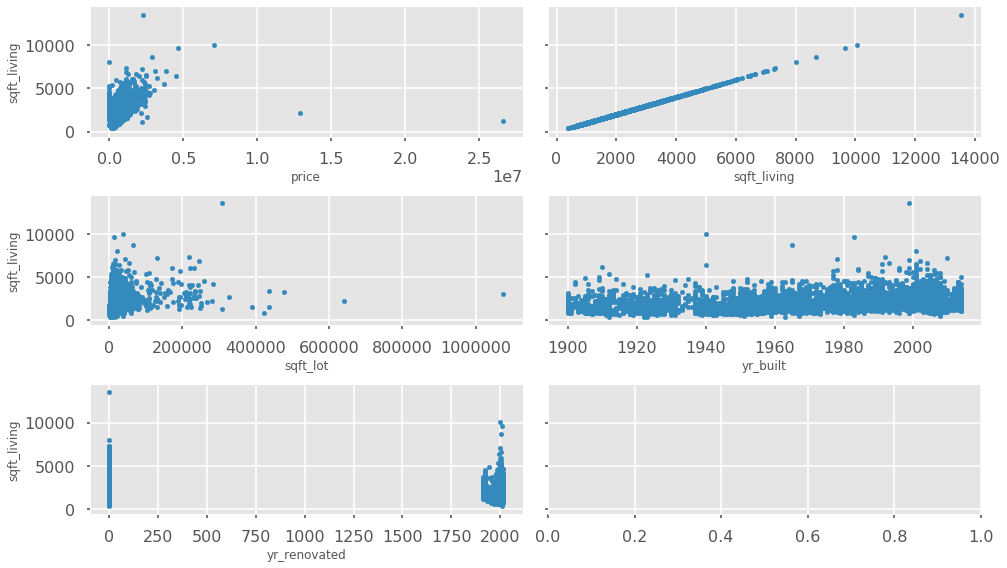

In [69]:
numeric_sqft_living_cols = ['price','sqft_living','sqft_lot','yr_built','yr_renovated']

fig, axes = plt.subplots(3, 2, figsize=(14, 8), sharey=True)

for col, ax in zip(numeric_sqft_living, axes.flatten()):
    data.plot(x=col, y = 'sqft_living', kind='scatter', ax=ax)

fig.tight_layout()

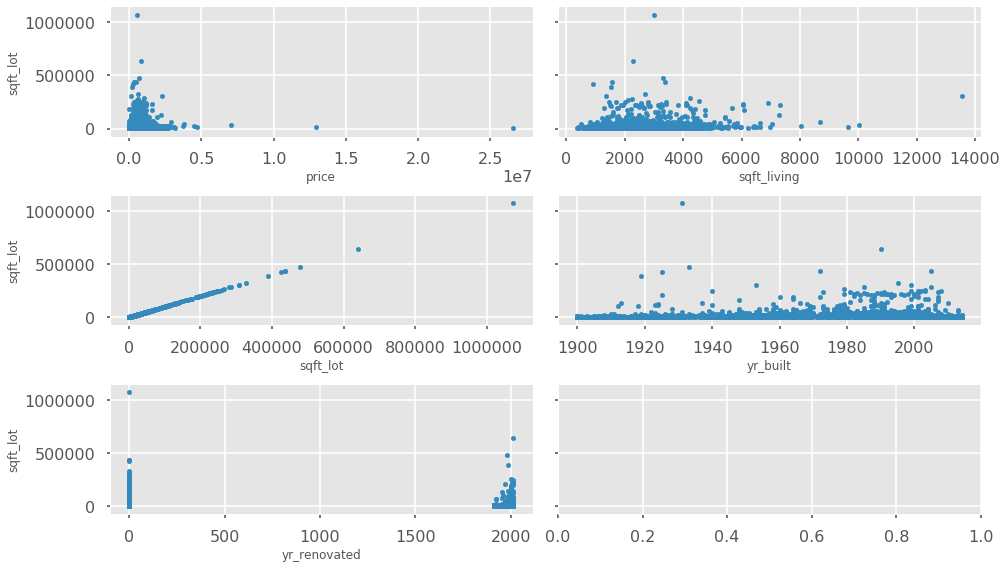

In [70]:
numeric_sqft_lot_cols = ['price','sqft_living','sqft_lot','yr_built','yr_renovated']

fig, axes = plt.subplots(3, 2, figsize=(14, 8), sharey=True)

for col, ax in zip(numeric_sqft_lot, axes.flatten()):
    data.plot(x=col, y = 'sqft_lot', kind='scatter', ax=ax)

fig.tight_layout()

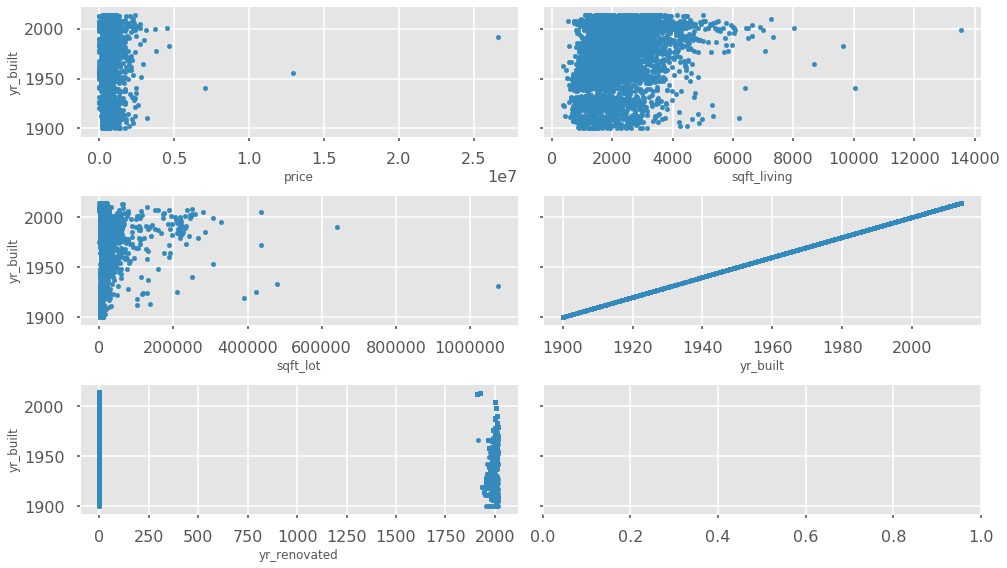

In [71]:
numeric_yr_built_cols = ['price','sqft_living','sqft_lot','yr_built','yr_renovated']

fig, axes = plt.subplots(3, 2, figsize=(14, 8), sharey=True)

for col, ax in zip(numeric_yr_built, axes.flatten()):
    data.plot(x=col, y = 'yr_built', kind='scatter', ax=ax)

fig.tight_layout()

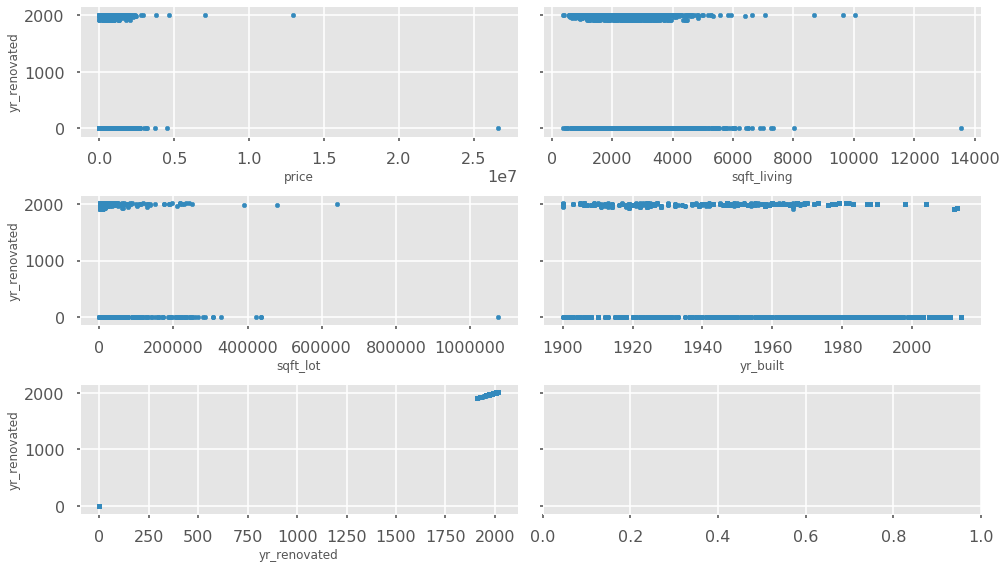

In [72]:
numeric_yr_renovated_cols = ['price','sqft_living','sqft_lot','yr_built','yr_renovated']

fig, axes = plt.subplots(3, 2, figsize=(14, 8), sharey=True)

for col, ax in zip(numeric_yr_renovated_cols, axes.flatten()):
    data.plot(x=col, y = 'yr_renovated', kind='scatter', ax=ax)

fig.tight_layout()

#### Numerical & Categorical

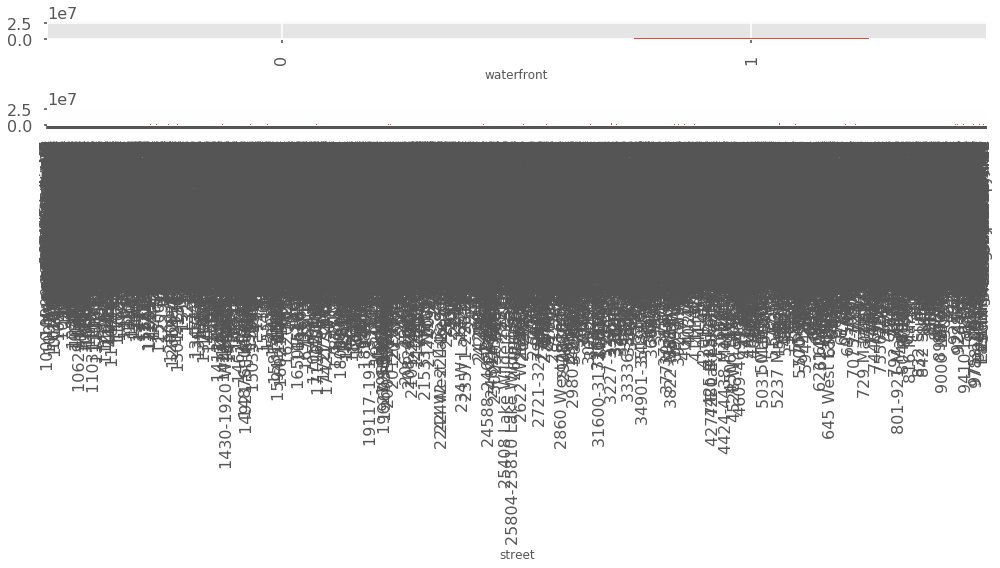

In [82]:
categorical_cols = ['waterfront','street','city']
numeric_price_cols = ['price','sqft_living','sqft_lot','yr_built','yr_renovated']

fig, axes = plt.subplots(2, 1, figsize=(14, 8), sharey=True)

for col, ax in zip(categorical_cols, axes.flatten()):
    data.groupby(col)['price'].mean().plot(kind='bar', ax=ax)

fig.tight_layout()

#### Categorical & Categorical

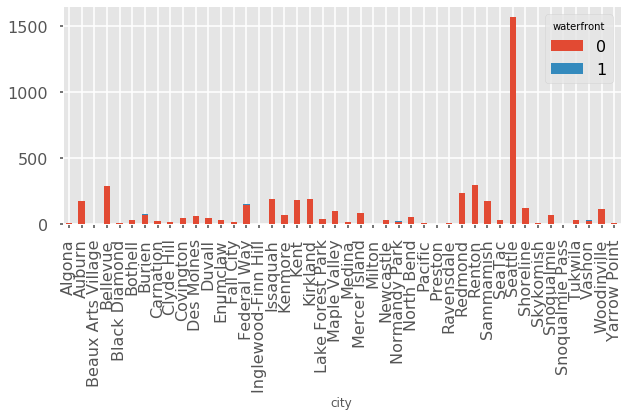

In [99]:
pd.crosstab(index=data['city'],columns=data['waterfront']).plot(kind='bar', stacked = True)

In [100]:
pd.crosstab(index=data['city'],columns=data['street']).plot(kind='bar', stacked = True)

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x0000000008D84558> (for post_execute):


KeyboardInterrupt: 

### Multivariate Analysis

In [101]:
pd.crosstab(index=data['city'],columns=data['waterfront'])

waterfront,0,1
city,,
Algona,5,0
Auburn,176,0
Beaux Arts Village,1,0
Bellevue,284,2
Black Diamond,9,0
Bothell,33,0
Burien,71,3
Carnation,22,0
Clyde Hill,11,0


In [103]:
data.pivot_table(index='city', columns='bedrooms', 
                    values='price', aggfunc='mean').round(2)

bedrooms,0,1,2,3,4,5,6,7,8,9
city,,,,,,,,,,
Algona,NaN,NaN,100000.00,213220.00,255000.00,NaN,NaN,NaN,NaN,NaN
Auburn,NaN,115000.00,245892.31,269467.71,347037.14,336400.00,280000.00,280000.0,NaN,NaN
Beaux Arts Village,NaN,NaN,NaN,745000.00,NaN,NaN,NaN,NaN,NaN,NaN
Bellevue,NaN,NaN,808300.00,667054.34,921050.19,1039570.72,851375.00,1119500.0,NaN,NaN
Black Diamond,NaN,NaN,398000.00,295390.00,393833.33,NaN,NaN,NaN,NaN,NaN
Bothell,NaN,NaN,575500.00,443537.50,508963.12,483900.00,NaN,NaN,NaN,NaN
Burien,NaN,247500.00,232480.30,360058.37,459338.00,319937.50,239400.00,NaN,NaN,NaN
Carnation,NaN,266616.67,649000.00,359222.22,723410.33,NaN,NaN,NaN,NaN,NaN
Clyde Hill,NaN,NaN,NaN,0.00,1152857.14,2157133.33,NaN,NaN,NaN,NaN


#### Correlation

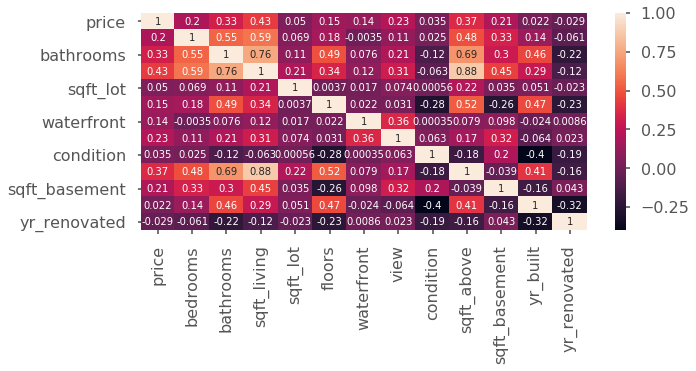

In [104]:
sns.heatmap(data.corr(), annot=True);

In [106]:
y = data['price']
y.head()

0     313000.0
1    2384000.0
2     342000.0
3     420000.0
4     550000.0
Name: price, dtype: float64

In [107]:
y_pred = y.mean()
y_pred

551962.9884732141

In [108]:
pd.np.sqrt(551962.9884732141)

742.9421165024999

In [109]:
error = y - y_pred
error.head()

0   -2.389630e+05
1    1.832037e+06
2   -2.099630e+05
3   -1.319630e+05
4   -1.962988e+03
Name: price, dtype: float64

In [110]:
error_squared = error ** 2
error_squared.head()

0    5.710331e+10
1    3.356360e+12
2    4.408446e+10
3    1.741423e+10
4    3.853324e+06
Name: price, dtype: float64

In [111]:
sum_of_errors = error_squared.sum()
sum_of_errors

1462066120691751.0

In [112]:
model_1_mse  = sum_of_errors / len(y)
model_1_mse

317840461019.94586